In [12]:
%load_ext autoreload
%autoreload 2
from gaussian_renderer import network_gui
from sgs2.gaussian import GaussianModel
from sgs2.scene import Scene
from sgs2.trainers.grid_trainer import GridTrainer
from sgs2.trainers.simple_trainer import SimpleTrainer
from sgs2.evaluation import evaluate_scene
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
train_scene = Scene(source_path="./datasets/train/")
alley_scene = Scene(source_path="./datasets/alleyds/")

Reading camera 301/301
Loading 301 Train Cameras at scale 1.0
Loading Test Cameras
Reading camera 346/346
Loading 346 Train Cameras at scale 1.0


/home/heng/miniconda3/envs/gsn/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:866: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Loading Test Cameras


In [3]:
train_simple = GaussianModel().import_from_sibr("./output/train_scene_simple_10000")
train_grid = GaussianModel().import_from_sibr("./output/train_scene_grid_10000")
train_grid_masked = GaussianModel().import_from_sibr("./output/train_scene_grid_masked_10000")

In [19]:
alley_simple = GaussianModel().import_from_sibr("./output/alley_scene_simple_10000")
alley_grid = GaussianModel().import_from_sibr("./output/alley_scene_grid_10000")
alley_grid_masked = GaussianModel().import_from_sibr("./output/alley_scene_grid_masked_10000")

In [4]:
train_simple_eval = evaluate_scene(train_scene, train_simple)
train_grid_eval = evaluate_scene(train_scene, train_grid)
train_grid_masked_eval = evaluate_scene(train_scene, train_grid_masked)

Evaluating training cameras


  0%|          | 0/301 [00:00<?, ?it/s]

100%|██████████| 301/301 [00:11<00:00, 26.52it/s]
0it [00:00, ?it/s]


No test cameras
Evaluating training cameras


100%|██████████| 301/301 [00:11<00:00, 26.42it/s]
0it [00:00, ?it/s]


No test cameras
Evaluating training cameras


100%|██████████| 301/301 [00:10<00:00, 27.52it/s]
0it [00:00, ?it/s]

No test cameras


In [20]:
alley_simple_eval = evaluate_scene(alley_scene, alley_simple)
alley_grid_eval = evaluate_scene(alley_scene, alley_grid)
alley_grid_masked_eval = evaluate_scene(alley_scene, alley_grid_masked)

Evaluating training cameras


100%|██████████| 346/346 [00:24<00:00, 14.03it/s]
0it [00:00, ?it/s]


No test cameras
Evaluating training cameras


100%|██████████| 346/346 [00:25<00:00, 13.78it/s]
0it [00:00, ?it/s]


No test cameras
Evaluating training cameras


100%|██████████| 346/346 [00:24<00:00, 13.86it/s]
0it [00:00, ?it/s]

No test cameras


In [31]:
def plot_evaluation_results(eval_results, method_names):
    # Define a color palette for the methods
    colors = plt.cm.viridis(np.linspace(0, 1, len(method_names)))

    # Plot three sub-graphs of bar charts comparing the three methods on each of the three metrics, arranged horizontally
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # Adjust size as needed

    for i, metric in enumerate(["psnr", "ssim", "lpips"]):
        # Extract metric values for each method for both training and potentially validation
        metric_values = [eval_results[j]["train"][metric] for j in range(len(method_names))]
        
        # Create bars with different colors
        axs[i].bar(method_names, metric_values, color=colors)
        
        axs[i].set_title(metric.upper())
        axs[i].set_xlabel('Method')
        axs[i].set_ylabel('Value')
        axs[i].tick_params(axis='x', rotation=45)  # Rotate method names for better readability

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

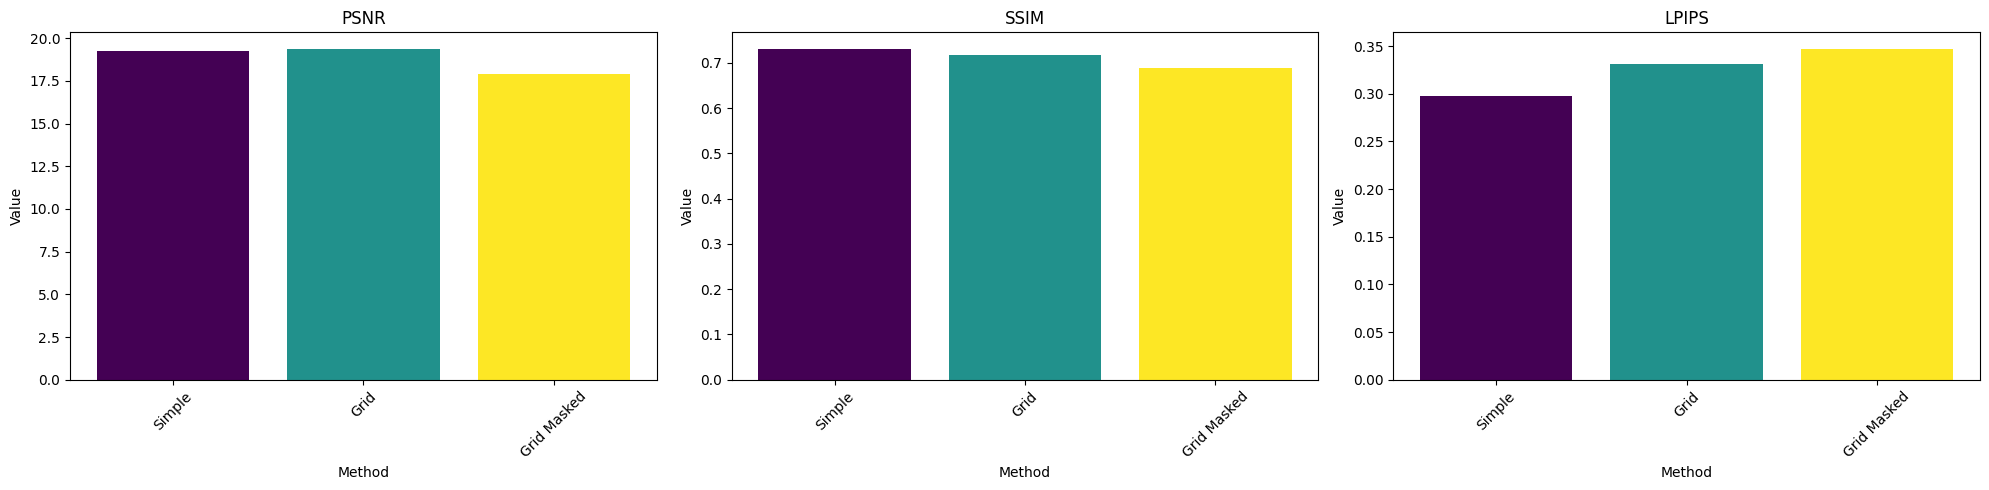

In [32]:
plot_evaluation_results([train_simple_eval, train_grid_eval, train_grid_masked_eval], ["Simple", "Grid", "Grid Masked"])

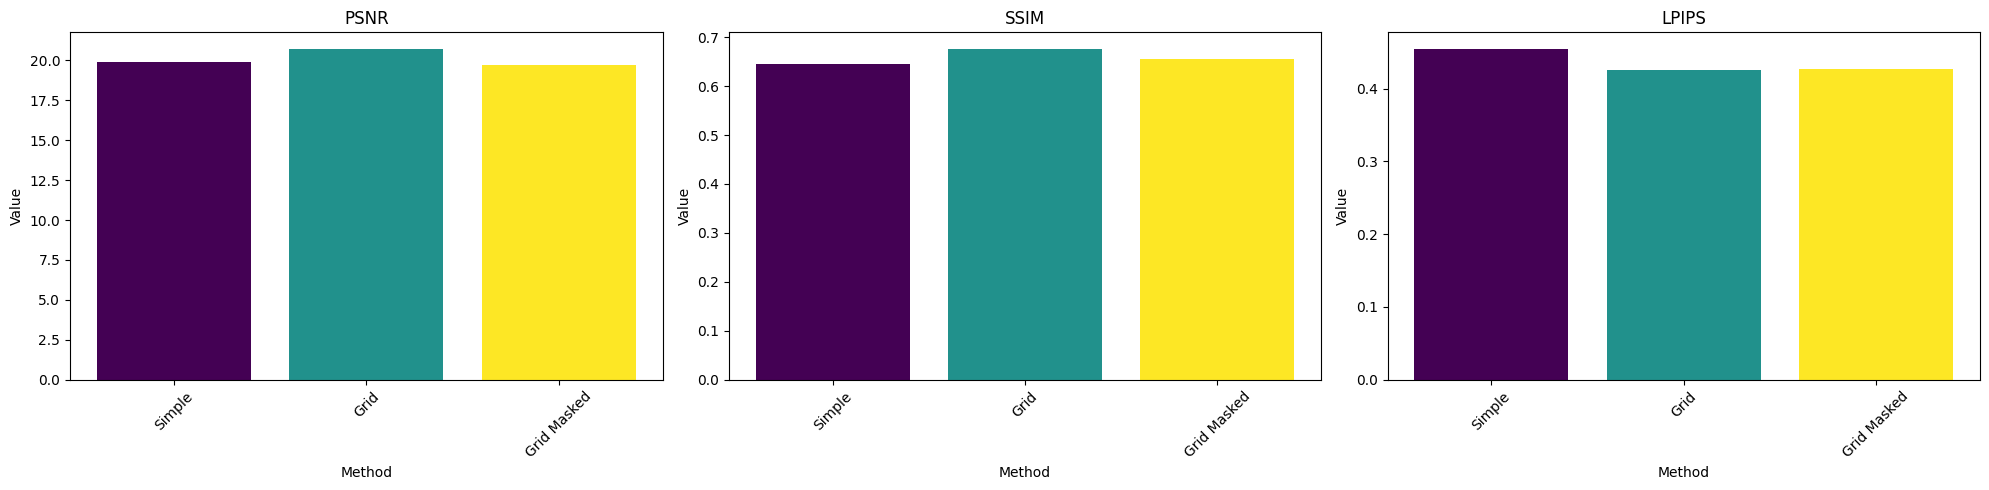

In [33]:
plot_evaluation_results([alley_simple_eval, alley_grid_eval, alley_grid_masked_eval], ["Simple", "Grid", "Grid Masked"])